
________________________________________________________________

This is instance 1

The Learning Rate for this instance is 0.0006000000000000001
The Amount of Epochs for this instance is 2000

Weight 0: 
-1.294238471324621

Weight 1: 
0.2426328983306823

Initial Cost: 0.125

End Cost: 0.062469215064603005



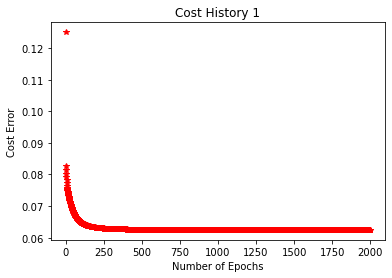

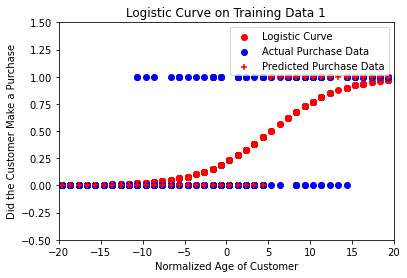


The in-sample mean-squared error is: 0.15



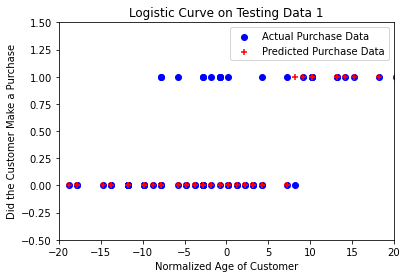


The out-of-sample mean-squared error is: 0.189873417721519


________________________________________________________________

This is instance 2

The Learning Rate for this instance is 0.006
The Amount of Epochs for this instance is 2000

Weight 0: 
-1.442265476936965

Weight 1: 
0.3105261847299926

Initial Cost: 0.125

End Cost: 0.06274467205490082



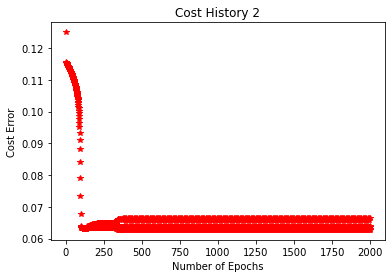

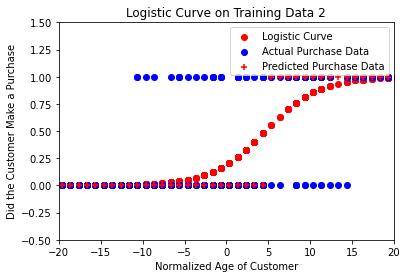


The in-sample mean-squared error is: 0.15



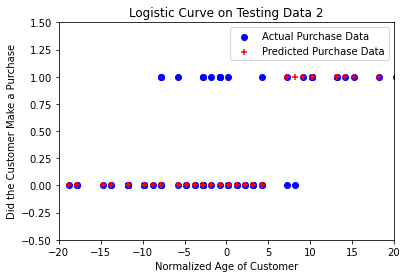


The out-of-sample mean-squared error is: 0.189873417721519


________________________________________________________________

This is instance 3

The Learning Rate for this instance is 0.060000000000000005
The Amount of Epochs for this instance is 2000

Weight 0: 
-1.5728290482219471

Weight 1: 
30.529764049814695

Initial Cost: 0.125

End Cost: 0.12343517112171574



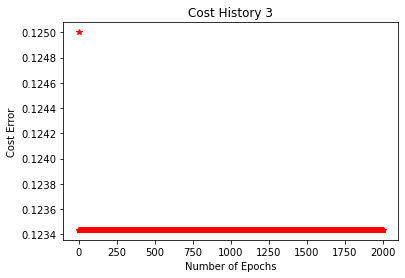

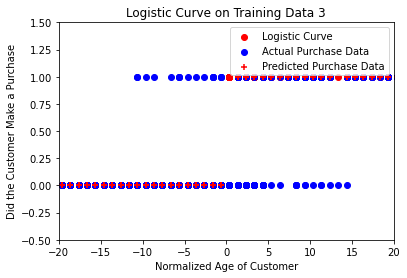


The in-sample mean-squared error is: 0.246875



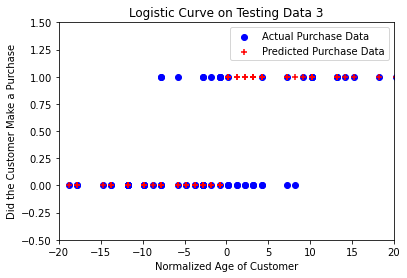


The out-of-sample mean-squared error is: 0.31645569620253167


________________________________________________________________

This is instance 4

The Learning Rate for this instance is 6e-05
The Amount of Epochs for this instance is 20000

Weight 0: 
-1.29422568796534

Weight 1: 
0.24263123272115797

Initial Cost: 0.125

End Cost: 0.06246921517278225



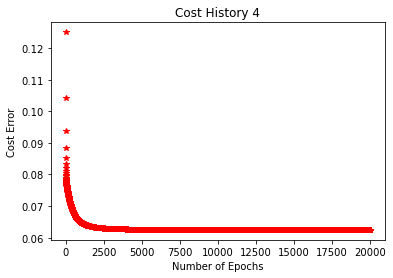

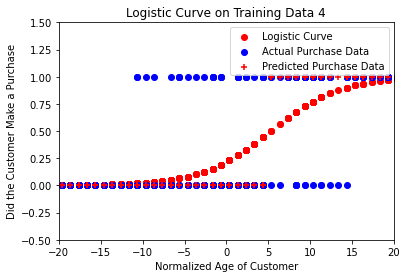


The in-sample mean-squared error is: 0.15



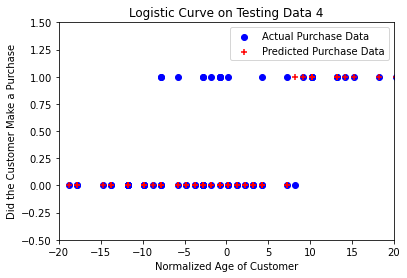


The out-of-sample mean-squared error is: 0.189873417721519


________________________________________________________________

This is instance 5

The Learning Rate for this instance is 6e-05
The Amount of Epochs for this instance is 200000

Weight 0: 
-1.295976930654429

Weight 1: 
0.24285949639340115

Initial Cost: 0.125

End Cost: 0.062469203928392905



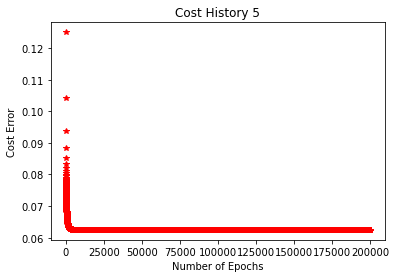

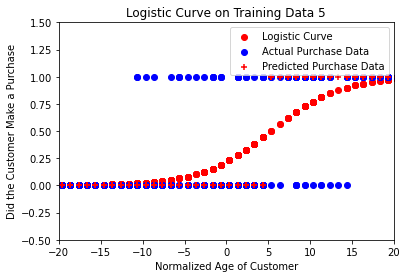


The in-sample mean-squared error is: 0.15



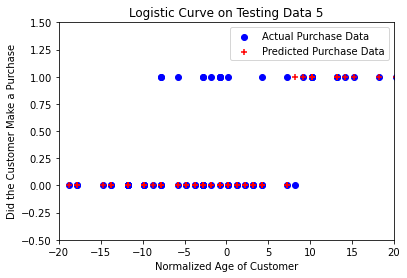


The out-of-sample mean-squared error is: 0.189873417721519


________________________________________________________________

This is instance 6

The Learning Rate for this instance is 6e-05
The Amount of Epochs for this instance is 2000000

Weight 0: 
-1.295976930654429

Weight 1: 
0.24285949639340115

Initial Cost: 0.125

End Cost: 0.062469203928392905



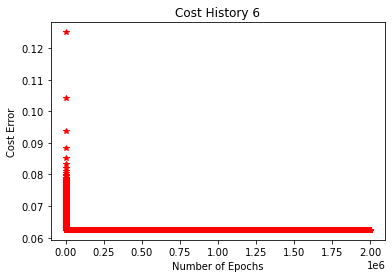

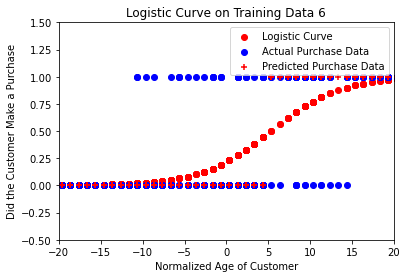


The in-sample mean-squared error is: 0.15



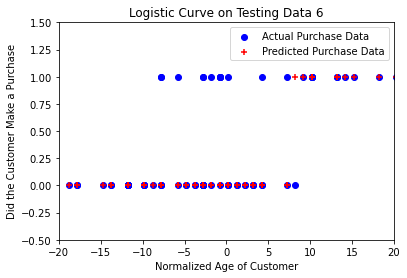


The out-of-sample mean-squared error is: 0.189873417721519

   Learning Rate     Epochs  Initial Cost  Final Cost  In-sample MSE  \
0        0.00060     2000.0         0.125    0.062469       0.150000   
1        0.00600     2000.0         0.125    0.062745       0.150000   
2        0.06000     2000.0         0.125    0.123435       0.246875   
3        0.00006    20000.0         0.125    0.062469       0.150000   
4        0.00006   200000.0         0.125    0.062469       0.150000   
5        0.00006  2000000.0         0.125    0.062469       0.150000   

   Out-of-sample MSE  
0           0.189873  
1           0.189873  
2           0.316456  
3           0.189873  
4           0.189873  
5           0.189873  


In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random


def taylor_series(x, order):
    maclaurin_series = []
    
    for i in range(order):
    
        negative_component = (-1)**i
        top_component = (x*2*np.pi)**((2*i)+1)
        bottom_component = math.factorial((2*i) + 1)
        maclaurin_series.append(negative_component*(top_component/bottom_component))

    maclaurin_series = sum(maclaurin_series)
    return maclaurin_series
    
def design_matrix(order, x):
    
    A= np.zeros([len(x), order])
    for i in range(order):
        A[:,i] = x**i
        
    return A

    
def predict(w0, w1, x):
    y = 1/(1+np.exp(-w0 - (w1*x)))
    return y

def logistic(x, y_sin, epochs = 150, learning_rate = 0.0001):
    w0 = 0
    w1 = 0
    
    cost_hist = np.zeros(epochs)
    for i in range(epochs):
        y = predict(w0, w1, x)
        d_w0 = (-2)*np.sum((y_sin - y)*y*(1-y))
        d_w1 = (-2)*np.sum((y_sin - y)*y*(1-y)*x)
        w0 = w0 - (learning_rate*d_w0)
        w1 = w1 - (learning_rate*d_w1)
        
        cost_hist[i] = cost(y_sin, y)
    return w1, w0, cost_hist

    
def cost(y_sin, y):
    
    current_cost = np.sum((y_sin - y)**2)*(1/(2*len(y_sin)))
    return current_cost

def pseudo_inverse(x, b, order):
    order += 1
    A = design_matrix(order, x)
    
    w = np.dot(np.linalg.inv(np.dot(A.T,A)),np.dot(A.T,b))
    y = np.dot(A, w)
    return (w, y, A)




# Read data from csv

data = pd.read_csv("Social_Network_Ads.csv")

A = np.zeros([len(data.index), 2])

# Create Dataset
A[:, 0] = data['Age']
A[:, 1] = data['Purchased']

# Split into training and testing
m, n = A.shape
p = 0.8 # 80% will be grabbed for the training set


index = np.linspace(0,399, 400)
random.shuffle(index)
index = index.astype(int)
Training = A[index[0 : np.floor(p * m).astype(int)], :]
Testing = A[index[np.floor(p * m).astype(int) + 1 :], :]


x = Training[:, 0]
b = Training[:, 1]

xt = Testing[:, 0]
bt = Testing[:, 1]

# Scatter plot
#plt.scatter(x, b, c='b')
#plt.show()

x = x - np.mean(x)
#plt.scatter(x, b, c='b')
#plt.show()


# Complete the logistic regression from class
rdata = {'Learning Rate':[], 'Epochs':[], 'Initial Cost':[], 'Final Cost':[],'In-sample MSE':[], 'Out-of-sample MSE':[]}
regressions = pd.DataFrame(rdata)
variations = 6
for instance in range(variations):
    print("\n________________________________________________________________\n")
    print("This is instance {}\n".format(instance + 1))

    learning_rate = 0.00006 #* (random.random()*2)
    epochs = 2000 #* (random.random()*2)
    if (instance <=2):
        learning_rate = learning_rate * 10**(instance + 1)
        
    else:
        epochs = epochs * 10**(instance - 2)
    
    
    epochs = int(epochs)
    
    print("The Learning Rate for this instance is {}".format(learning_rate))
    print("The Amount of Epochs for this instance is {}\n".format(epochs))

    target = np.array([b])
    #x = np.array([x]).T
    A = design_matrix(2, x)

    # predict training data from logistic curve (find w0, w1)

    w = np.ones(2)
    w = np.array([w]).T
    w1, w0, cost_hist = logistic(x, b, epochs, learning_rate)
    
    
    print("Weight 0: \n{}\n".format(w0))
    print("Weight 1: \n{}\n".format(w1))
    plt.figure(2)
    plt.plot(np.linspace(0, epochs-1, epochs), cost_hist, 'r*')
    plt.title("Cost History {}".format(instance+1))
    plt.xlabel("Number of Epochs")
    plt.ylabel("Cost Error")
    print("Initial Cost: {}\n".format(cost_hist[0]))
    print("End Cost: {}\n".format(cost_hist[-1]))
    plt.show()

    # Using this logistic curve, determine threshold, 0.5, which determines cutoff
    #from the logistic function (whether the customer will or will not buy)

    y = predict(w0, w1, x)
    x1 = x
    y1 = y>0.5

    plt.scatter(x, y, c='r', label = 'Logistic Curve')
    plt.scatter(x, b, c='b', marker = 'o', label = 'Actual Purchase Data')
    plt.scatter(x1, y1,c='r', marker = '+', label = 'Predicted Purchase Data')
    plt.title("Logistic Curve on Training Data {}".format(instance + 1))
    plt.xlabel("Normalized Age of Customer")
    plt.ylabel("Did the Customer Make a Purchase")
    plt.axis([-20, 20, -.5, 1.5])
    plt.legend()
    plt.show()



    # Find the in-sample error of the model against the training data
    in_sample_mse = np.sum((b-y1)**2)/len(x)
    
    print("\nThe in-sample mean-squared error is: {}\n".format(in_sample_mse))

    # Use the test data to estimate the out-of-sample error
    xt = xt - np.mean(xt)
    yt = w1*xt + w0
    x2 = xt
    y2 = yt>0.5

    plt.scatter(xt, bt, c='b', marker = 'o', label = 'Actual Purchase Data')
    plt.scatter(x2, y2,c='r', marker = '+', label = 'Predicted Purchase Data')
    plt.title('Logistic Curve on Testing Data {}'.format(instance + 1))
    plt.xlabel('Normalized Age of Customer')
    plt.ylabel("Did the Customer Make a Purchase")
    plt.axis([-20, 20, -.5, 1.5])
    plt.legend()
    plt.show()

    out_sample_mse = np.sum((bt-y2)**2)/len(xt)
    
    print("\nThe out-of-sample mean-squared error is: {}\n".format(out_sample_mse))
    new_row = {'Learning Rate':learning_rate, 'Epochs':epochs, 'Initial Cost':cost_hist[0], 'Final Cost':cost_hist[-1],'In-sample MSE':in_sample_mse, 'Out-of-sample MSE':out_sample_mse}
    regressions = regressions.append(new_row, ignore_index = True)
    
    
print(regressions)